In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt



%matplotlib inline


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')


In [4]:
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df.tail()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df1 = df.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

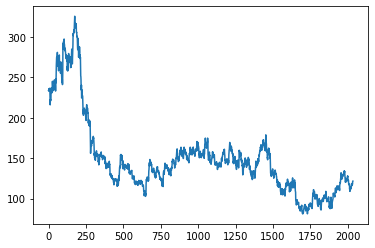

In [8]:
plt.plot(df1)


In [9]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [15]:
training_size = int(len(df1)*0.75)
test_size=int(len(df1)) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [16]:
def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)  

In [17]:
ts = 100
X_train, y_train = create_features(train_data, ts)
X_test, y_test = create_features(test_data, ts)

In [18]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [27]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 27s 465ms/step - loss: 0.0299 - val_loss: 0.0076
Epoch 2/100
23/23 [==============================] - 9s 400ms/step - loss: 0.0037 - val_loss: 0.0020
Epoch 3/100
23/23 [==============================] - 9s 400ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/100
23/23 [==============================] - 9s 389ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 5/100
23/23 [==============================] - 9s 403ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 6/100
23/23 [==============================] - 9s 380ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/100
23/23 [==============================] - 8s 363ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
23/23 [==============================] - 8s 344ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/100
23/23 [==============================] - 8s 345ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 10/100
23/23 [==============================] - 11s 469ms/step - loss: 0.0010 - val_

In [30]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [32]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

163.68121983026853

In [33]:
math.sqrt(mean_squared_error(y_test,test_predict))

106.33132375274238

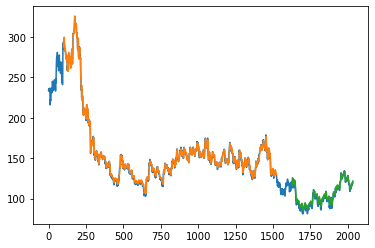

In [34]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

509

In [36]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [39]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16836731]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
len(df1)

2035

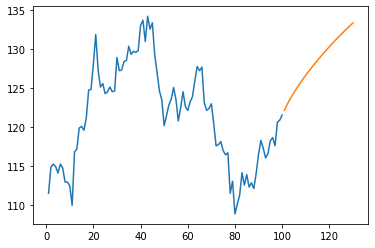

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

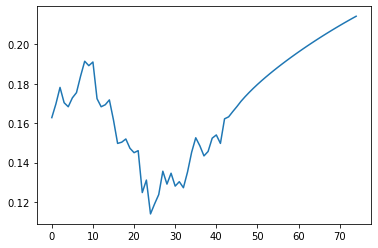

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1990:])

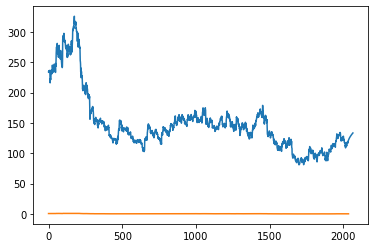

In [44]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.plot(df1)